#### Problem Statment:
practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.
1. Data Exploration and Preprocessing:
•	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
•	Handle missing values as per the best practices (imputation, removal, etc.).
•	Apply scaling techniques to numerical features:
•	Standard Scaling
•	Min-Max Scaling
•	Discuss the scenarios where each scaling technique is preferred and why.
2. Encoding Techniques:
•	Apply One-Hot Encoding to categorical variables with less than 5 categories.
•	Use Label Encoding for categorical variables with more than 5 categories.
•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.
3. Feature Engineering:
•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.
4. Feature Selection:
•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.


#### About the Data:

This assignment aims to equip you with practical skills in data preprocessing, feature engineering, and feature selection techniques, which are crucial for building efficient machine learning models. You will work with a provided dataset to apply various techniques such as scaling, encoding, and feature selection methods including isolation forest and PPS score analysis.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv("C:\\Users\\hp\\Desktop\\assignments\\EDA2\\adult_with_headers.csv")

In [3]:
raw_data

age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital_gain  capital_loss  hours_per_week  native_country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [4]:
raw_data.shape

(32561, 15)

#### About the Data:
CharityML is a fictitious charity/non-profit organization located in the heart of Silicon Valley that was established to provide financial support for people and it survives only on donations. After nearly 32,000 letters were sent to people in the community, CharityML determined that every donation they received came from someone that was making more than $50,000 annually. To expand their potential donor base, CharityML has decided to send letters to residents of California, but to only those most likely to donate to the charity. With nearly 15 million working Californians, CharityML has brought you on board to help build an algorithm to best identify potential donors and reduce overhead cost of sending mail.

Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with. While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features.

In this project, we will employ several Machine Learning algorithms of to accurately model individuals' income using data collected from the 1994 U.S. Census. The ultimate goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000.

The dataset for this project basically originates from the UCI Machine Learning Repository. (University of California, Irvine, School of Information and Computer Science, Center for Machine Learning and Intelligent Systems) The UCI Machine Learning Repository is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms. The archive was created as an ftp archive in 1987 by David Aha and fellow graduate students at UC Irvine. Since that time, it has been widely used by students, educators, and researchers all over the world as a primary source of machine learning data sets.
#### Data Summary:

 - age: Numerical, representing the age of the individual.
 - workclass: Categorical, indicating the type of employment (e.g., State-gov, Private).
 - fnlwgt: Numerical, representing the final weight, which is a factor indicating the number of people the observation represents.
 - education: Categorical, indicating the highest level of education attained (e.g., Bachelors, HS-grad).
 - education_num: Numerical, representing the number of years of education.
 - marital_status: Categorical, indicating the marital status (e.g., Never-married, Married-civ-spouse).
 - occupation: Categorical, indicating the type of occupation (e.g., Adm-clerical, Exec-managerial).
 - relationship: Categorical, indicating the individual's relationship to the household (e.g., Not-in-family, Husband).
 - race: Categorical, indicating the race of the individual (e.g., White, Black).
 - sex: Categorical, indicating the gender of the individual (Male, Female).
 - capital_gain: Numerical, indicating capital gains.
 - capital_loss: Numerical, indicating capital losses.
 - hours_per_week: Numerical, representing the number of hours worked per week.
 - native_country: Categorical, indicating the native country of the individual.
 - income: Categorical, indicating whether the income is less than or equal to 50K or more than 50K.
 - Let's summarize this data with some statistics and insights.



# Data Exploration:

In [5]:
raw_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [6]:
raw_data.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
raw_data["native_country"].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [9]:
raw_data["education"].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

# Data Preprocessing:

Checking Null values:

In [10]:
raw_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Text(0.5, 1.0, 'Checking for null values')

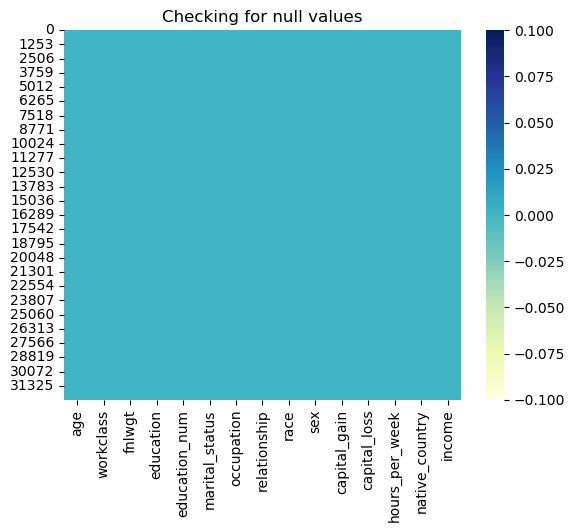

In [11]:
sns.heatmap(data=raw_data.isnull(),cmap="YlGnBu")
plt.title("Checking for null values")

There is no null values found in this data

#### Checking for duplicate values:

In [12]:
raw_data.duplicated().sum()

24

In [13]:
raw_data[raw_data.duplicated()]

age          workclass  fnlwgt      education  education_num  \
4881    25            Private  308144      Bachelors             13   
5104    90            Private   52386   Some-college             10   
9171    21            Private  250051   Some-college             10   
11631   20            Private  107658   Some-college             10   
13084   25            Private  195994        1st-4th              2   
15059   21            Private  243368      Preschool              1   
17040   46            Private  173243        HS-grad              9   
18555   30            Private  144593        HS-grad              9   
18698   19            Private   97261        HS-grad              9   
21318   19            Private  138153   Some-college             10   
21490   19            Private  146679   Some-college             10   
21875   49            Private   31267        7th-8th              4   
22300   25            Private  195994        1st-4th              2   
22367   44            Private  367749      Bachelors             13   
22494   49   Self-emp-not-inc   43479   Some-college             10   
25872   23            Private  240137        5th-6th              3   
26313   28            Private  274679        Masters             14   
28230   27            Private  255582        HS-grad              9   
28522   42            Private  204235   Some-college             10   
28846   39            Private   30916        HS-grad              9   
29157   38            Private  207202        HS-grad              9   
30845   46            Private  133616   Some-college             10   
31993   19            Private  251579   Some-college             10   
32404   35            Private  379959        HS-grad              9   

            marital_status          occupation    relationship  \
4881         Never-married        Craft-repair   Not-in-family   
5104         Never-married       Other-service   Not-in-family   
9171         Never-married      Prof-specialty       Own-child   
11631        Never-married        Tech-support   Not-in-family   
13084        Never-married     Priv-house-serv   Not-in-family   
15059        Never-married     Farming-fishing   Not-in-family   
17040   Married-civ-spouse        Craft-repair         Husband   
18555        Never-married       Other-service   Not-in-family   
18698        Never-married     Farming-fishing   Not-in-family   
21318        Never-married        Adm-clerical       Own-child   
21490        Never-married     Exec-managerial       Own-child   
21875   Married-civ-spouse        Craft-repair         Husband   
22300        Never-married     Priv-house-serv   Not-in-family   
22367        Never-married      Prof-specialty   Not-in-family   
22494   Married-civ-spouse        Craft-repair         Husband   
25872        Never-married   Handlers-cleaners   Not-in-family   
26313        Never-married      Prof-specialty   Not-in-family   
28230        Never-married   Machine-op-inspct   Not-in-family   
28522   Married-civ-spouse      Prof-specialty         Husband   
28846   Married-civ-spouse        Craft-repair         Husband   
29157   Married-civ-spouse   Machine-op-inspct         Husband   
30845             Divorced        Adm-clerical       Unmarried   
31993        Never-married       Other-service       Own-child   
32404             Divorced       Other-service   Not-in-family   

                      race      sex  capital_gain  capital_loss  \
4881                 White     Male             0             0   
5104    Asian-Pac-Islander     Male             0             0   
9171                 White   Female             0             0   
11631                White   Female             0             0   
13084                White   Female             0             0   
15059                White     Male             0             0   
17040                White     Male             0             0   
18555                Black     Male         

Observation: there are 24 values found I have to remove by using `drop_duplicate()` function

In [14]:
raw_data=raw_data.drop_duplicates()

In [15]:
raw_data[raw_data.duplicated()]

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income]
Index: []

In [16]:
print(raw_data.duplicated().sum())

0


 After Removing Duplicate Values, There Is No Duplicated Values Found

Let's separate numerical features and categorical features

In [17]:
num_features = raw_data.select_dtypes(include=['int64', 'float64']).columns
for i in raw_data[num_features]:
    print ("---- %s ---" % i)
    print (raw_data[i].value_counts())

---- age ---
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
---- fnlwgt ---
164190    13
123011    13
203488    13
148995    12
113364    12
          ..
138342     1
158040     1
232784     1
325573     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64
---- education_num ---
9     10494
10     7282
13     5353
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: education_num, dtype: int64
---- capital_gain ---
0        29825
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital_gain, Length: 119, dtype: int64
---- capital_loss ---
0       31018
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489      

Data Visualization

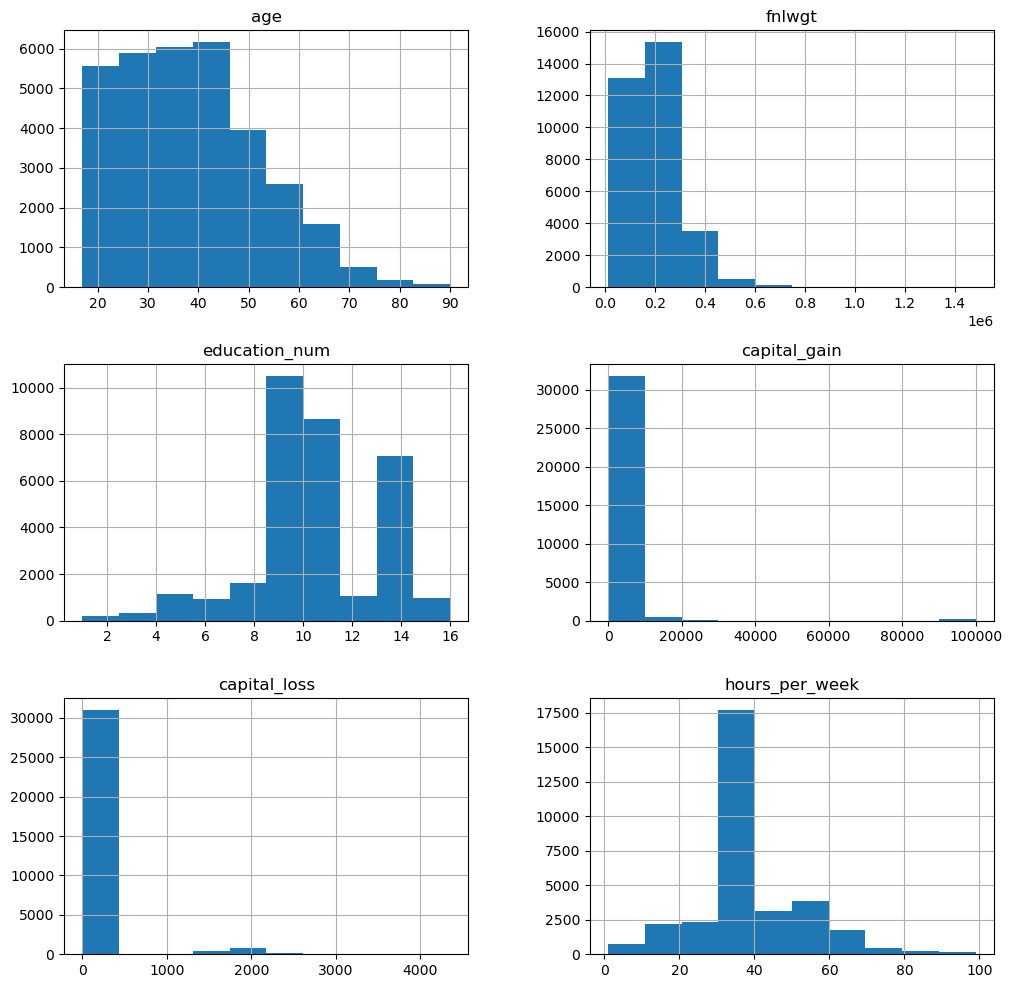

In [18]:

raw_data[num_features].hist(figsize = (12,12))
plt.show()

Now its for categorical data

In [19]:
cat_fea = raw_data.select_dtypes(include=['object']).columns

In [20]:
cat_fea

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

         Count       %
 Male    21775  66.92%
 Female  10762  33.08%


Text(0.5, 1.0, 'Gender distribution')

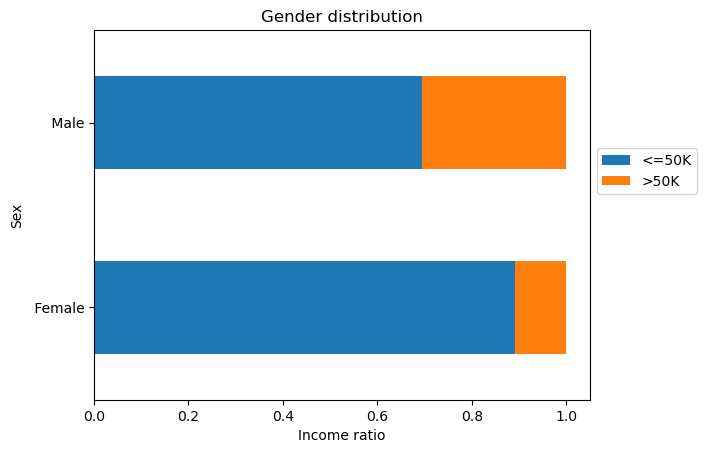

In [21]:
t=raw_data.sex
counts=t.value_counts()
percentage= t.value_counts(normalize=True).mul(100).round(2).astype(str)+'%'
tab=pd.DataFrame({"Count": counts, "%": percentage })
print(tab)

#gender ditribution 
gender_group = raw_data.groupby(['sex', 'income']).size().unstack()
gender_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False)
plt.legend(['<=50K', '>50K'], bbox_to_anchor=(1.0, 0.7))
plt.ylabel('Sex')
plt.xlabel('Income ratio')
plt.title("Gender distribution")

<Axes: >

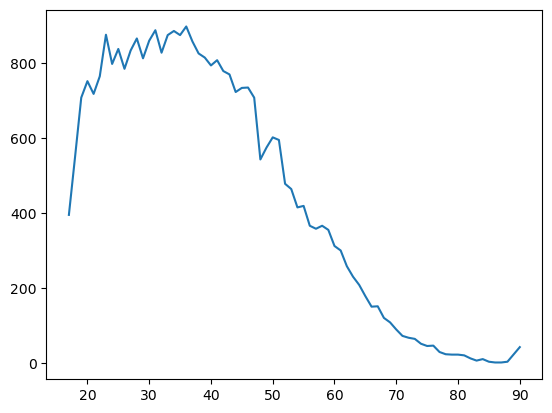

In [22]:
# Age distribution in the datset
raw_data['age'].value_counts().sort_index().plot.line()

<Axes: >

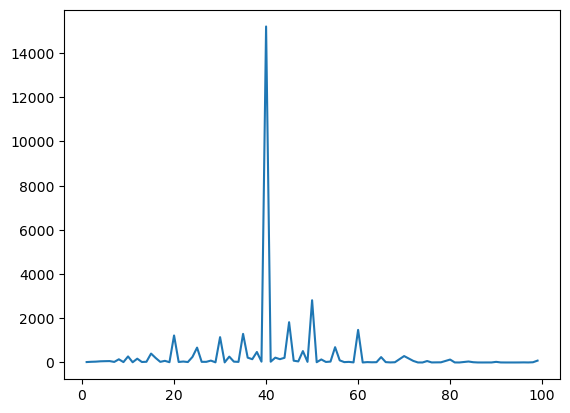

In [23]:
# hours per week distribution; hours per week vs income
raw_data['hours_per_week'].value_counts().sort_index().plot.line()

In [24]:
#education
import plotly.graph_objects as go

# Strip leading and trailing spaces from the 'education' column
raw_data['education'] = raw_data['education'].str.strip()

# Get the counts of each education category
education_counts = raw_data['education'].value_counts()

# Create a bar chart with Plotly
fig = go.Figure([go.Bar(x=education_counts.index, y=education_counts.values)])
fig.update_layout(title_text='Education Distribution in the Dataset',
                  xaxis_title='Education',
                  yaxis_title='Count',
                  template='plotly_white')

Text(0.5, 1.0, 'Education distribution')

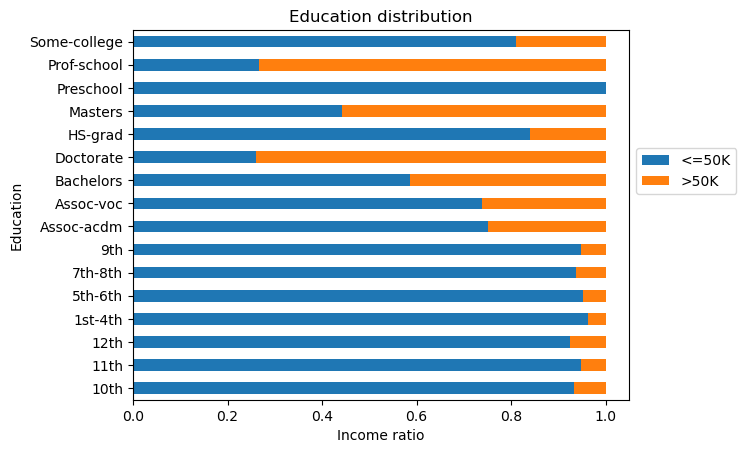

In [25]:
edu_group = raw_data.groupby(['education', 'income']).size().unstack()
edu_group.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=False) # apply(lambda x:x/x.sum(), axis=1) is used to get percentage Bar plots
plt.legend(['<=50K', '>50K'], bbox_to_anchor=(1.0, 0.7))
plt.ylabel('Education')
plt.xlabel('Income ratio')
plt.title("Education distribution")

Text(0.5, 1.0, 'Workclass distribution')

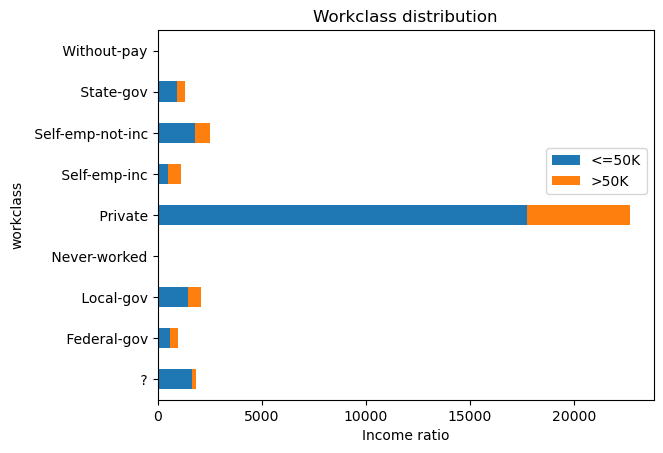

In [26]:
# Workclass distribution; workclass vs income
wrkcls = raw_data.groupby(['workclass', 'income']).size().unstack()
wrkcls.plot(kind='barh', stacked=True, legend=False)
plt.legend(['<=50K', '>50K'], bbox_to_anchor=(1.0, 0.7))
plt.ylabel('workclass')
plt.xlabel('Income ratio')
plt.title("Workclass distribution")

Text(0.5, 1.0, 'Occupation distribution')

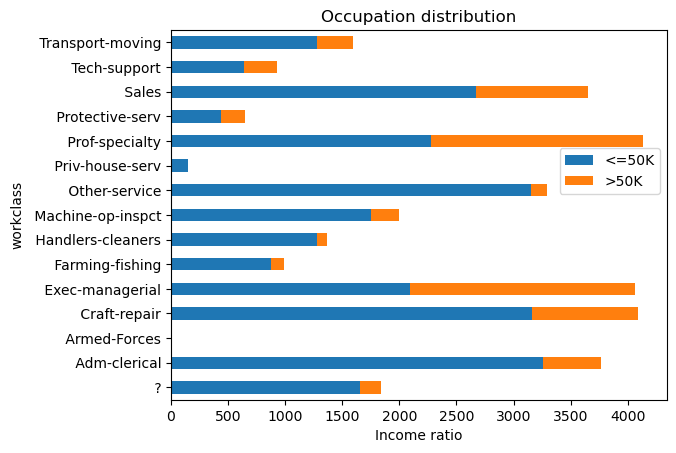

In [27]:
occu = raw_data.groupby(['occupation', 'income']).size().unstack()
occu.plot(kind='barh', stacked=True, legend=False)
plt.legend(['<=50K', '>50K'], bbox_to_anchor=(1.0, 0.7))
plt.ylabel('workclass')
plt.xlabel('Income ratio')
plt.title("Occupation distribution")

Text(0.5, 1.0, 'Relationship')

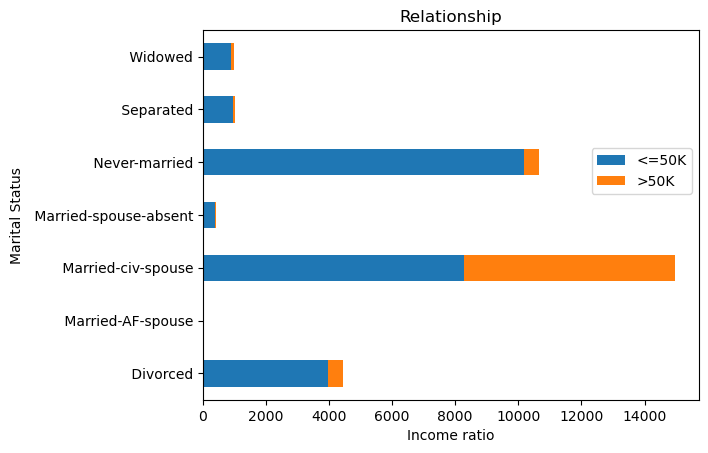

In [28]:
# marital status
marital = raw_data.groupby(['marital_status', 'income']).size().unstack()
marital.plot(kind='barh', stacked=True, legend=False)
plt.legend(['<=50K', '>50K'], bbox_to_anchor=(1.0, 0.7))
plt.ylabel('Marital Status')
plt.xlabel('Income ratio')
plt.title("Relationship")

Lets MinMax Scaling for numerical features

In [29]:
from sklearn.preprocessing import MinMaxScaler
data=raw_data[num_features]
scaler= MinMaxScaler()
scaled_num_data=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

In [30]:
scaled_num_data.describe()

age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32537.000000  32537.000000   32537.000000  32537.000000  32537.000000   
mean       0.295692      0.120547       0.605454      0.010785      0.020057   
std        0.186822      0.071689       0.171442      0.073880      0.092539   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.150685      0.071679       0.533333      0.000000      0.000000   
50%        0.273973      0.112788       0.600000      0.000000      0.000000   
75%        0.424658      0.152611       0.733333      0.000000      0.000000   
max        1.000000      1.000000       1.000000      1.000000      1.000000   

       hours_per_week  
count    32537.000000  
mean         0.402452  
std          0.125989  
min          0.000000  
25%          0.397959  
50%          0.397959  
75%          0.448980  
max          1.000000

### After minmax scaled numerical data

#### Min-Max Scaling (Normalization)
Definition: Transforms the data to fit within a given range, usually 0 to 1.
𝑥
′
=
(
𝑥
−
𝑥
𝑚
𝑖
𝑛
)
(
𝑥
𝑚
𝑎
𝑥
−
𝑥
𝑚
𝑖
𝑛
)
x 
′
 = 
(x 
max
​
 −x 
min
​
 )
(x−x 
min
​
 )
​
 

Preferred Scenarios:

Algorithms that do not assume normal distribution: Especially useful in scenarios where the data does not follow a Gaussian distribution.
Neural networks: These typically perform better with inputs normalized to a range (e.g., 0 to 1 or -1 to 1) as it helps in faster convergence.
Why: Min-Max scaling is straightforward and preserves the relationships between the original data points by scaling the data linearly.

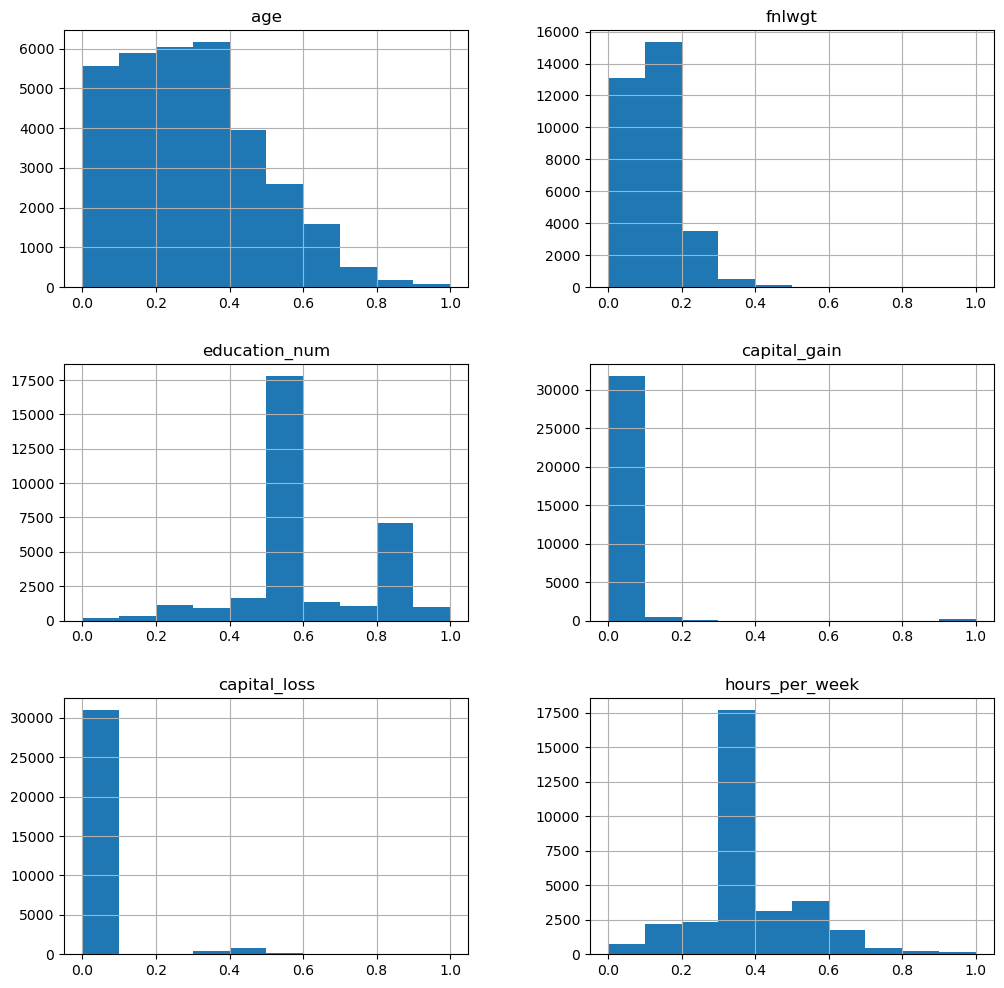

In [31]:
scaled_num_data.hist(figsize = (12,12))
plt.show()

### Lets Standard scaling for numerical data

#### Standard Scaling (Z-score Normalization)
Definition: Transforms the data to have a mean of 0 and a standard deviation of 1.
𝑧
=
(
𝑥
−
𝜇
)
𝜎
z= 
σ
(x−μ)
​
 

Preferred Scenarios:

Algorithms that assume normally distributed data: Many machine learning algorithms, such as linear regression, logistic regression, and SVMs, perform better when the features are normally distributed.
Algorithms that use distance metrics: Algorithms like k-NN and k-means clustering, which rely on Euclidean distance, can benefit from standard scaling.
Why: Standard scaling centers the data and scales it based on standard deviation, making it suitable for algorithms sensitive to the variance of the data.

In [32]:
from sklearn.preprocessing import StandardScaler
data = raw_data[num_features]
scaler = MinMaxScaler()
std_scaled_num_data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

In [33]:
std_scaled_num_data

age    fnlwgt  education_num  capital_gain  capital_loss  \
0      0.301370  0.044302       0.800000      0.021740           0.0   
1      0.452055  0.048238       0.800000      0.000000           0.0   
2      0.287671  0.138113       0.533333      0.000000           0.0   
3      0.493151  0.151068       0.400000      0.000000           0.0   
4      0.150685  0.221488       0.800000      0.000000           0.0   
...         ...       ...            ...           ...           ...   
32532  0.136986  0.166404       0.733333      0.000000           0.0   
32533  0.315068  0.096500       0.533333      0.000000           0.0   
32534  0.561644  0.094827       0.533333      0.000000           0.0   
32535  0.068493  0.128499       0.533333      0.000000           0.0   
32536  0.479452  0.187203       0.533333      0.150242           0.0   

       hours_per_week  
0            0.397959  
1            0.122449  
2            0.397959  
3            0.397959  
4            0.397959  
...               ...  
32532        0.377551  
32533        0.397959  
32534        0.397959  
32535        0.193878  
32536        0.397959  

[32537 rows x 6 columns]

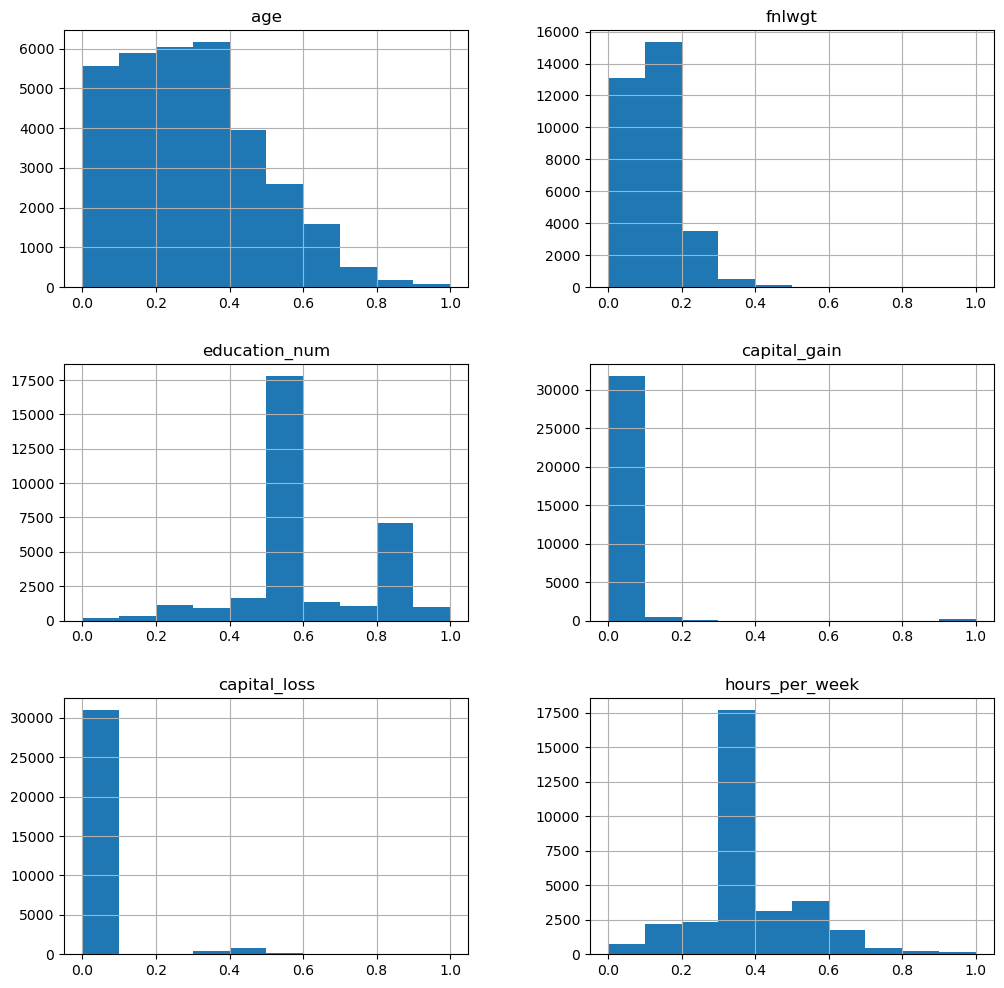

In [34]:
std_scaled_num_data.hist(figsize = (12,12))
plt.show()

#  Encoding Techniques:

### One-Hot Encoding
    Pros:
    No Ordinal Relationships:

    One-hot encoding treats each category as an independent entity, which is useful for categorical features that do not have an inherent order (e.g., colors, countries).
    Compatibility with Many Algorithms:

    Many machine learning algorithms (like linear regression, logistic regression, and distance-based algorithms) perform better with one-hot encoded data as it avoids the false assumption of ordinal relationships.
    Handles Multiple Categories:

    Works well for categorical variables with a relatively small number of distinct categories.
    Cons:
        - High Dimensionality:

        - One-hot encoding can significantly increase the dimensionality of the dataset, especially for features with many categories. This can lead to the "curse of dimensionality" and increased computational resources.
        - Sparse Data:

        - The resulting one-hot encoded data is sparse (many zeros), which might not be efficient for some algorithms and could lead to performance issues.
        - Scalability:

        - With a large number of categories, the resulting dataset can become very large, making it difficult to handle and process.
### Label Encoding
    Pros:
    Simplicity:

    Label encoding is simple to implement and does not increase the dimensionality of the data, making it efficient in terms of memory and computation.
    Efficient Representation:

    Suitable for algorithms that can naturally handle categorical features as integers (e.g., tree-based algorithms like Decision Trees, Random Forests, and Gradient Boosting Machines).
    Order Preservation:

    Useful when there is an ordinal relationship between categories (e.g., low, medium, high).
    Cons:
    False Ordinal Relationships:

    Label encoding can introduce ordinal relationships where none exist, leading to incorrect assumptions by the algorithm (e.g., 'red' < 'green' < 'blue').
    Algorithm Bias:

    Algorithms that assume numerical relationships (e.g., linear regression, k-NN) might misinterpret the encoded values, leading to poor performance.
    Limited Use Cases:

    Not suitable for categorical features with a large number of categories as it can introduce bias and incorrect relationships.

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
raw_data["workclass"]=le.fit_transform(raw_data["workclass"])
raw_data["education"]=le.fit_transform(raw_data["education"])
raw_data["marital_status"]=le.fit_transform(raw_data["marital_status"])
raw_data["occupation"]=le.fit_transform(raw_data["occupation"])
raw_data["race"]=le.fit_transform(raw_data["race"])
raw_data["sex"]=le.fit_transform(raw_data["sex"])
raw_data["native_country"]=le.fit_transform(raw_data["native_country"])
raw_data["relationship"]=le.fit_transform(raw_data["relationship"])
raw_data.head()

age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  sex  capital_gain  capital_loss  \
0           1             1     4    1          2174             0   
1           4             0     4    1             0             0   
2           6             1     4    1             0             0   
3           6             0     2    1             0             0   
4          10             5     2    0             0             0   

   hours_per_week  native_country  income  
0              40              39   <=50K  
1              13              39   <=50K  
2              40              39   <=50K  
3              40              39   <=50K  
4              40               5   <=50K

In [36]:
cat_fea

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

#### The choice between one-hot encoding and label encoding largely depends on the nature of the categorical data and the specific requirements of the machine learning algorithm being used:

 - One-Hot Encoding is preferred when:

    - The categorical feature does not have an ordinal relationship.
    - The number of categories is manageable, and the increased dimensionality is not a major issue.
    - The algorithm cannot handle ordinal relationships or might misinterpret them (e.g., linear regression, logistic regression).
 - Label Encoding is preferred when:

    - The categorical feature has a natural ordinal relationship.
    - The algorithm can handle categorical features as integers and does not assume ordinal relationships (e.g., tree-based algorithms).
    - The number of categories is large, and one-hot encoding would lead to high dimensionality.

In [37]:
# Capital Gain/Loss Indicator Features
raw_data['has_capital_gain'] = raw_data['capital_gain'].apply(lambda x: 1 if x > 0 else 0)
raw_data['has_capital_loss'] = raw_data['capital_loss'].apply(lambda x: 1 if x > 0 else 0)

In [38]:
raw_data

age  workclass  fnlwgt  education  education_num  marital_status  \
0       39          7   77516          9             13               4   
1       50          6   83311          9             13               2   
2       38          4  215646         11              9               0   
3       53          4  234721          1              7               2   
4       28          4  338409          9             13               2   
...    ...        ...     ...        ...            ...             ...   
32556   27          4  257302          7             12               2   
32557   40          4  154374         11              9               2   
32558   58          4  151910         11              9               6   
32559   22          4  201490         11              9               4   
32560   52          5  287927         11              9               2   

       occupation  relationship  race  sex  capital_gain  capital_loss  \
0               1             1     4    1          2174             0   
1               4             0     4    1             0             0   
2               6             1     4    1             0             0   
3               6             0     2    1             0             0   
4              10             5     2    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32556          13             5     4    0             0             0   
32557           7             0     4    1             0             0   
32558           1             4     4    0             0             0   
32559           1             3     4    1             0             0   
32560           4             5     4    0         15024             0   

       hours_per_week  native_country  income  has_capital_gain  \
0                  40              39   <=50K                 1   
1                  13              39   <=50K                 0   
2                  40              39   <=50K                 0   
3                  40              39   <=50K                 0   
4                  40               5   <=50K                 0   
...               ...             ...     ...               ...   
32556              38              39   <=50K                 0   
32557              40              39    >50K                 0   
32558              40              39   <=50K                 0   
32559              20              39   <=50K                 0   
32560              40              39    >50K                 1   

       has_capital_loss  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
32556                 0  
32557                 0  
32558                 0  
32559                 0  
32560                 0  

[32537 rows x 17 columns]

#### Applying Log Transformation
We will apply the log transformation to capital_gain because it's often highly skewed. The log transformation can help normalize the distribution, reduce the impact of extreme values, and improve model performance.

Text(0.5, 1.0, 'Distribution of capital_gain')

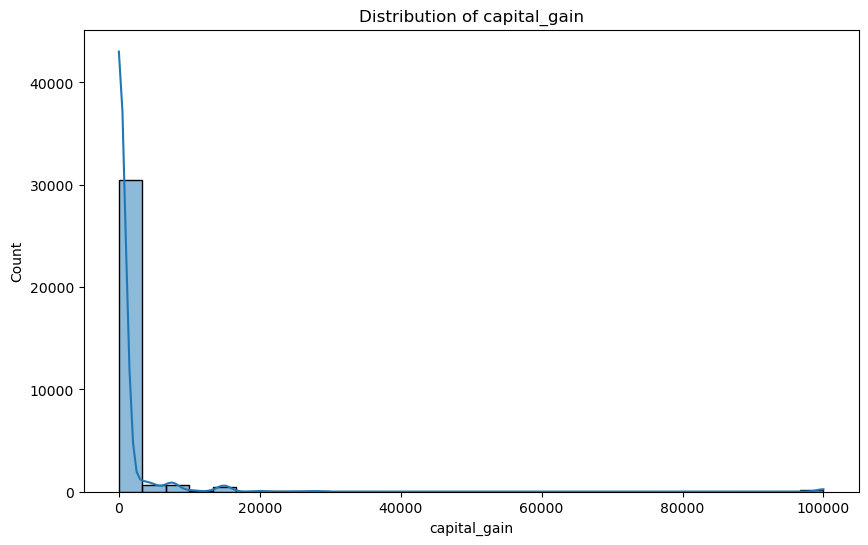

In [39]:
# Checking the distribution of capital_gain
plt.figure(figsize=(10, 6))
sns.histplot(raw_data['capital_gain'], kde=True, bins=30)
plt.title('Distribution of capital_gain')

In [40]:
# Applying log transformation
raw_data['log_capital_gain'] = np.log1p(raw_data['capital_gain'])  # log1p is log(1 + x) to handle zero values

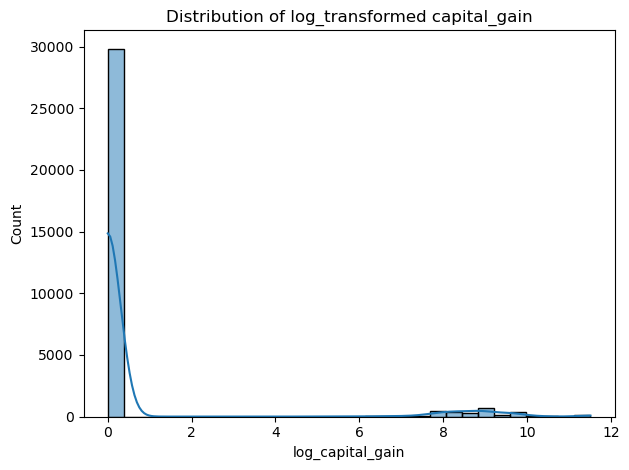

In [41]:
# Checking the distribution after log transformation
sns.histplot(raw_data['log_capital_gain'], kde=True, bins=30)
plt.title('Distribution of log_transformed capital_gain')

plt.tight_layout()
plt.show()

#  Outliers:

Outliers can significantly affect model performance by introducing noise and skewing the results. Outliers can lead to:

Poor Model Fit: Extreme values can distort the model's ability to learn the underlying pattern in the data, leading to overfitting or underfitting.
Biased Parameters: In algorithms like linear regression, outliers can heavily influence the estimated parameters, resulting in biased predictions.
Increased Error: Outliers can increase the overall error of the model, reducing its accuracy and reliability.
Misleading Metrics: Performance metrics can be misleading if outliers are present, as they can skew the results and mask the true performance of the model.

In [42]:
def box_plot(df):
    # Create box plots for numerical variables
    fig, axes = plt.subplots(df.shape[1], 1, figsize=(10, df.shape[1] * 2))
    axes = axes.flatten()
    for ax, col in zip(axes, df.columns):
        sns.boxplot(x=df[col], ax=ax, palette="crest")
        ax.set_xlabel(col)
        ax.set_ylabel("Range")

    plt.tight_layout()
    plt.show()

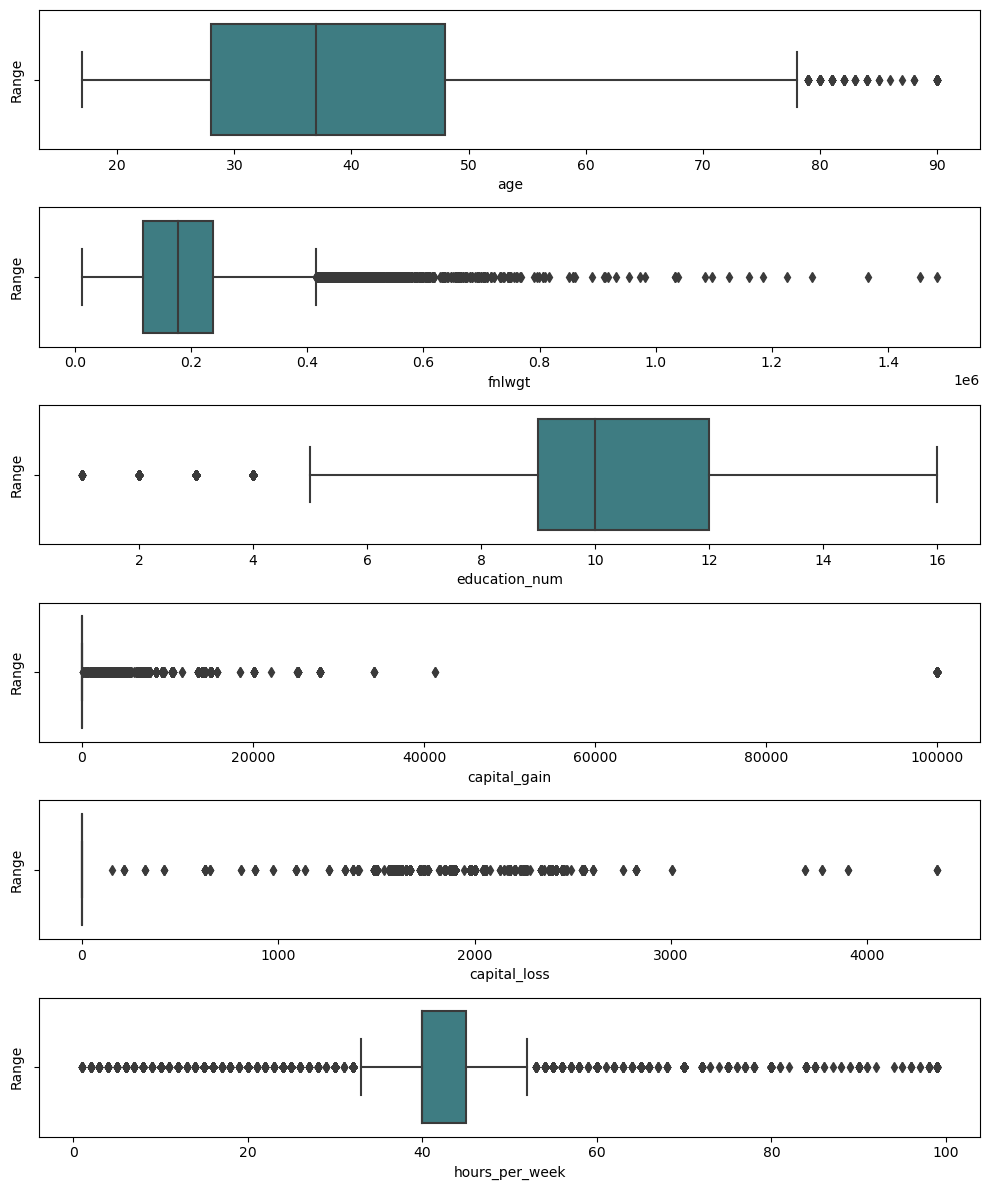

In [43]:
#checking for outliers
box_plot(raw_data[num_features])

In [44]:
from sklearn.ensemble import IsolationForest
# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(raw_data[num_features])

In [45]:
# -1 indicates an outlier, 1 indicates an inlier
raw_data['outlier'] = outliers
raw_data["outlier"].value_counts()

 1    30910
-1     1627
Name: outlier, dtype: int64

In [46]:
# Remove outliers
cleaned_data = raw_data[raw_data['outlier'] == -1].drop(columns=['outlier'])

print(cleaned_data)

       age  workclass  fnlwgt  education  education_num  marital_status  \
23      43          4  117037          1              7               2   
52      47          4   51835         14             15               2   
77      67          0  212759          0              6               2   
96      48          6  191277         10             16               2   
106     17          0  304873          0              6               4   
...    ...        ...     ...        ...            ...             ...   
32469   58          5  181974         10             16               4   
32494   82          0  403910         11              9               4   
32518   57          2  110417         11              9               2   
32525   81          0  120478          8             11               0   
32531   30          0   33811          9             13               4   

       occupation  relationship  race  sex  capital_gain  capital_loss  \
23             14        

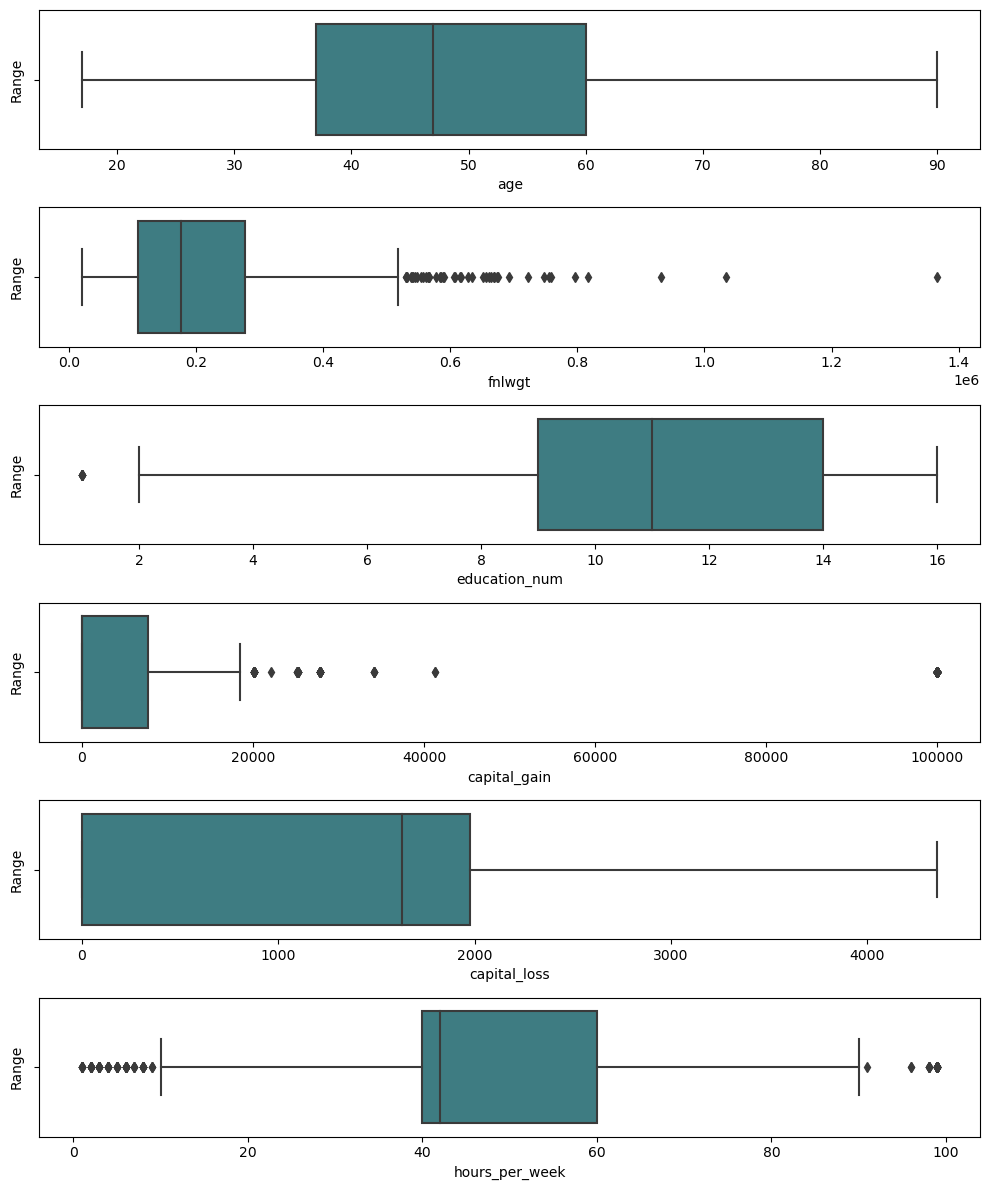

In [47]:
box_plot(cleaned_data[num_features])

In [48]:
cleaned_data1 = cleaned_data.copy()
cleaned_data1["scores"] = iso_forest.decision_function(cleaned_data[num_features])
cleaned_data1

age  workclass  fnlwgt  education  education_num  marital_status  \
23      43          4  117037          1              7               2   
52      47          4   51835         14             15               2   
77      67          0  212759          0              6               2   
96      48          6  191277         10             16               2   
106     17          0  304873          0              6               4   
...    ...        ...     ...        ...            ...             ...   
32469   58          5  181974         10             16               4   
32494   82          0  403910         11              9               4   
32518   57          2  110417         11              9               2   
32525   81          0  120478          8             11               0   
32531   30          0   33811          9             13               4   

       occupation  relationship  race  sex  capital_gain  capital_loss  \
23             14             0     4    1             0          2042   
52             10             5     4    0             0          1902   
77              0             0     4    1             0             0   
96             10             0     4    1             0          1902   
106             0             3     4    0         34095             0   
...           ...           ...   ...  ...           ...           ...   
32469          10             1     4    0             0             0   
32494           0             1     4    1             0             0   
32518           3             0     4    1         99999             0   
32525           0             4     4    0             0             0   
32531           0             1     1    0             0             0   

       hours_per_week  native_country  income  has_capital_gain  \
23                 40              39   <=50K                 0   
52                 60              16    >50K                 0   
77                  2              39   <=50K                 0   
96                 60              39    >50K                 0   
106                32              39   <=50K                 1   
...               ...             ...     ...               ...   
32469              99               0   <=50K                 0   
32494               3              39   <=50K                 0   
32518              40              39    >50K                 1   
32525               1               0   <=50K                 0   
32531              99              39   <=50K                 0   

       has_capital_loss  log_capital_gain    scores  
23                    1          0.000000 -0.016782  
52                    1          0.000000 -0.057444  
77                    0          0.000000 -0.009378  
96                    1          0.000000 -0.052691  
106                   0         10.436935 -0.077183  
...                 ...               ...       ...  
32469                 0          0.000000 -0.030440  
32494                 0          0.000000 -0.045243  
32518                 0         11.512925 -0.113980  
32525                 0          0.000000 -0.024946  
32531                 0          0.000000 -0.001833  

[1627 rows x 19 columns]

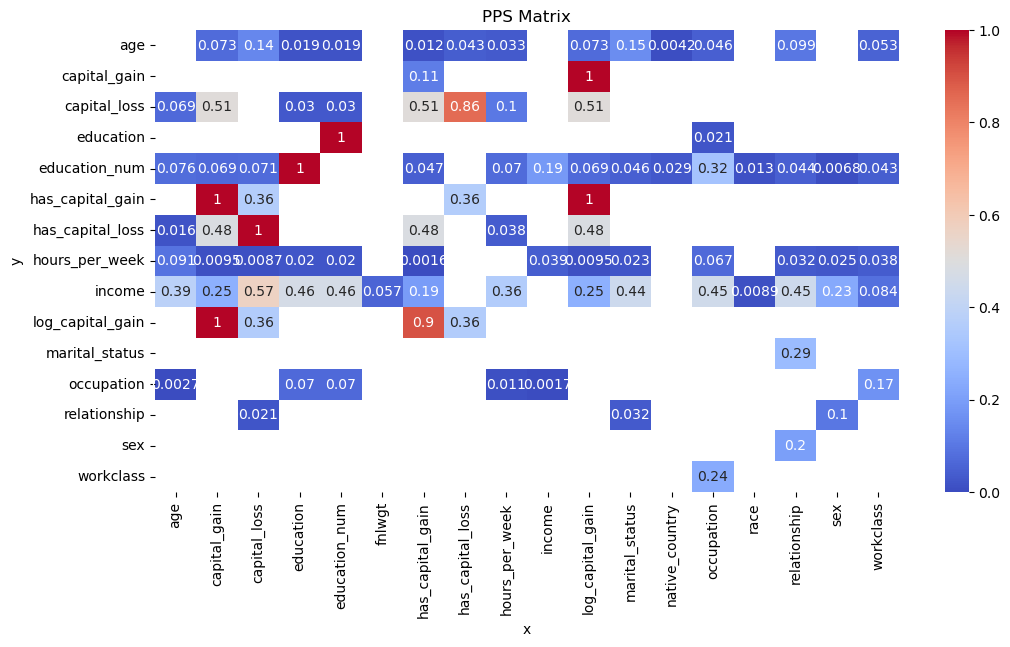

In [49]:
import ppscore as pps
# Calculate PPS matrix
pps_matrix = pps.matrix(cleaned_data)

# Display PPS matrix
pps_matrix_filtered = pps_matrix[(pps_matrix['ppscore'] > 0.0) & (pps_matrix['x'] != pps_matrix['y'])]
pps_matrix_pivot = pps_matrix_filtered.pivot(columns='x', index='y', values='ppscore')

plt.figure(figsize=(12, 6))
sns.heatmap(pps_matrix_pivot, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('PPS Matrix')
plt.show()

Lets split the data 

In [50]:
from sklearn.model_selection import train_test_split
X = cleaned_data.drop(columns=["income"])
y =cleaned_data["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Feature Selection:

New Features:
Age Group:

Young: Individuals under 30.
Middle-aged: Individuals between 30 and 50.
Senior: Individuals over 50.
This feature helps in capturing non-linear relationships between age and income.
Capital Gain/Loss Indicator:

has_capital_gain: Indicates whether an individual has any capital gains.
has_capital_loss: Indicates whether an individual has any capital losses.
These features help in capturing the impact of capital gains and losses on income without introducing excessive noise.
By adding these features, we aim to provide the model with more relevant information that can help improve its predictive power. Here's how to implement these new features in the context of your existing data preprocessing:

In [51]:
#Feature selection: Select K best features

from sklearn.feature_selection import SelectKBest,chi2
X_train=pd.DataFrame(X_train)
np.seterr(divide='ignore',invalid='ignore')
kbest_selector=SelectKBest(k=X_train.shape[1])

training_selected_features=kbest_selector.fit_transform(X_train,y_train)

selected_cols = kbest_selector.get_support(indices=True)
selected_feature_names = X_train.columns.values[selected_cols]

training_selected_features=pd.DataFrame(training_selected_features)

scores = kbest_selector.scores_[kbest_selector.get_support()]
selected_feature_names_scores = list(zip(selected_feature_names, scores))

Feat_F1score_combined = pd.DataFrame(data = selected_feature_names_scores, columns=['Feature_names', 'F_Scores'])
Feat_F1score_combined = Feat_F1score_combined.sort_values(['F_Scores', 'Feature_names'], ascending = [False, True])

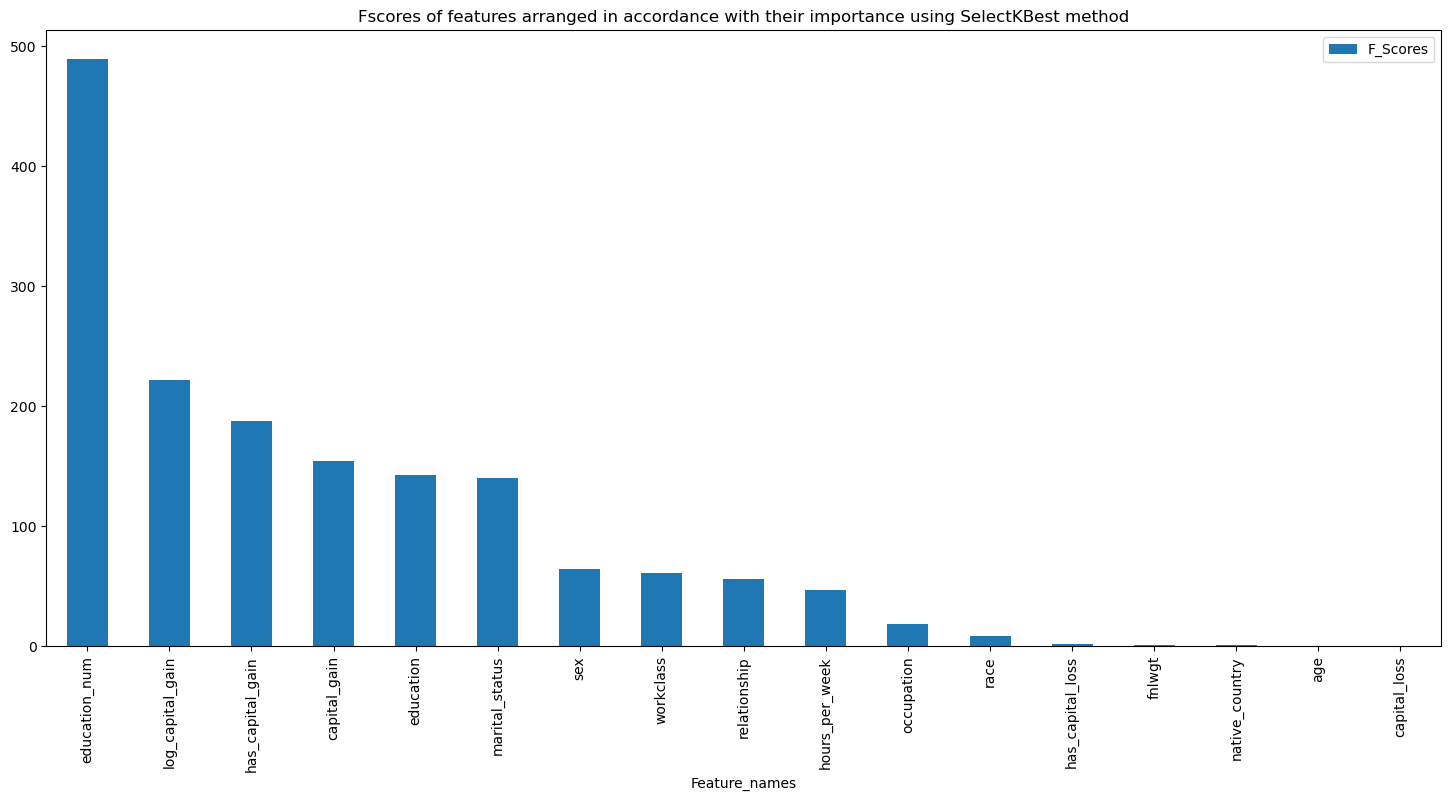

In [52]:
Feat_F1score_combined.plot(x='Feature_names',y='F_Scores',kind='bar',title='Fscores of features arranged in accordance with their importance using SelectKBest method',figsize=(18,8))
#Setting the F score threshold as 20, we get a total of 20 features which have F scores beyond this value

kbest_selector=SelectKBest(k=17)
X_train=kbest_selector.fit_transform(X_train,y_train)

In [53]:
Feat_F1score_combined

Feature_names    F_Scores
4      education_num  488.664287
16  log_capital_gain  221.756760
14  has_capital_gain  187.786648
10      capital_gain  154.521151
3          education  142.722831
5     marital_status  139.960050
9                sex   64.491886
1          workclass   61.090455
7       relationship   55.808490
12    hours_per_week   46.519085
6         occupation   18.026574
8               race    8.469531
15  has_capital_loss    1.522841
2             fnlwgt    0.745841
13    native_country    0.602511
0                age    0.323321
11      capital_loss    0.002380

In [54]:
from sklearn.model_selection import train_test_split
X = cleaned_data.drop(columns=["income"])
y =cleaned_data["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=400)
rfe = RFE(model)
fit = rfe.fit(X_train, y_train)

selected_features = X_train.columns[fit.support_]
ranking = fit.ranking_

Features selected out of all features

In [56]:
print("Selected Features:", selected_features)
print("Feature Ranking:", ranking)

Selected Features: Index(['workclass', 'education_num', 'marital_status', 'relationship', 'sex',
       'has_capital_gain', 'has_capital_loss', 'log_capital_gain'],
      dtype='object')
Feature Ranking: [ 4  1 10  3  1  1  6  1  2  1  9  7  8  5  1  1  1]


In [57]:
# Transform the training data to include only the selected features
X_train_selected = fit.transform(X_train)
print(f"Shape of training data after RFE: {X_train_selected.shape}")

Shape of training data after RFE: (1301, 8)


Importence of the features

In [58]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
print(model.feature_importances_)

[0.06641343 0.00576598 0.03757401 0.01395768 0.05526623 0.07375548
 0.01738335 0.         0.00285939 0.         0.20387619 0.49060401
 0.00876901 0.00320798 0.         0.         0.02056724]
